In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


In [29]:
data=pd.read_csv("Netflix-Subscriptions.csv")

In [30]:
data.head()

,Time Period,Subscribers
0,01/04/2013,34240000
1,01/07/2013,35640000
2,01/10/2013,38010000
3,01/01/2014,41430000
4,01/04/2014,46130000


In [31]:
data.isnull().sum()

Time Period    0
Subscribers    0
dtype: int64

In [32]:
data.dtypes

Time Period    object
Subscribers     int64
dtype: object

In [33]:
data.columns

Index(['Time Period', 'Subscribers'], dtype='object')

In [34]:
data["Time Period"]=pd.to_datetime(data["Time Period"],format="%d/%m/%Y")

In [35]:
data.head()

,Time Period,Subscribers
0,2013-04-01,34240000
1,2013-07-01,35640000
2,2013-10-01,38010000
3,2014-01-01,41430000
4,2014-04-01,46130000


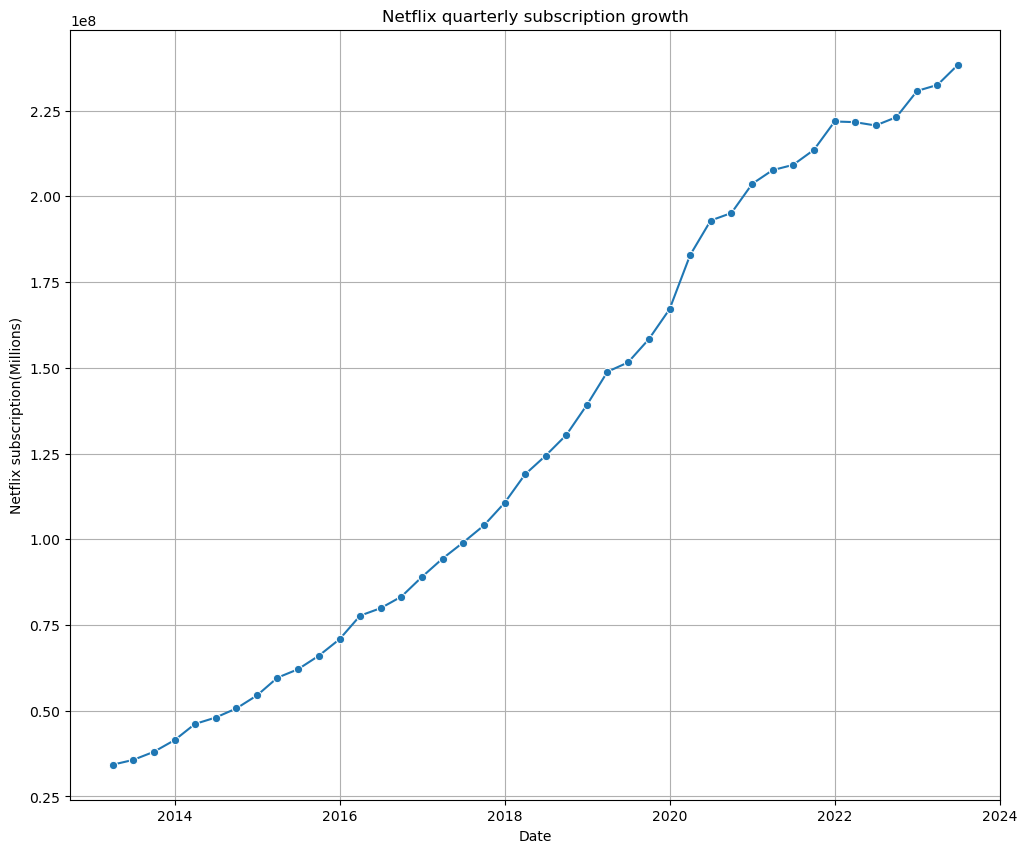

In [36]:
# Quarterly susbscription growth

plt.figure(figsize=(12,10))
sns.lineplot(x=data["Time Period"],y=data["Subscribers"],marker="o")
plt.title("Netflix quarterly subscription growth")
plt.xlabel("Date")
plt.ylabel("Netflix subscription(Millions)")
plt.grid()

In [37]:
# Calculating quarterly growth rate

data["quarterly_growth_rate"]=data["Subscribers"].pct_change() * 100

In [38]:
data.head()

,Time Period,Subscribers,quarterly_growth_rate
0,2013-04-01,34240000,NaN
1,2013-07-01,35640000,4.088785
2,2013-10-01,38010000,6.649832
3,2014-01-01,41430000,8.997632
4,2014-04-01,46130000,11.344436


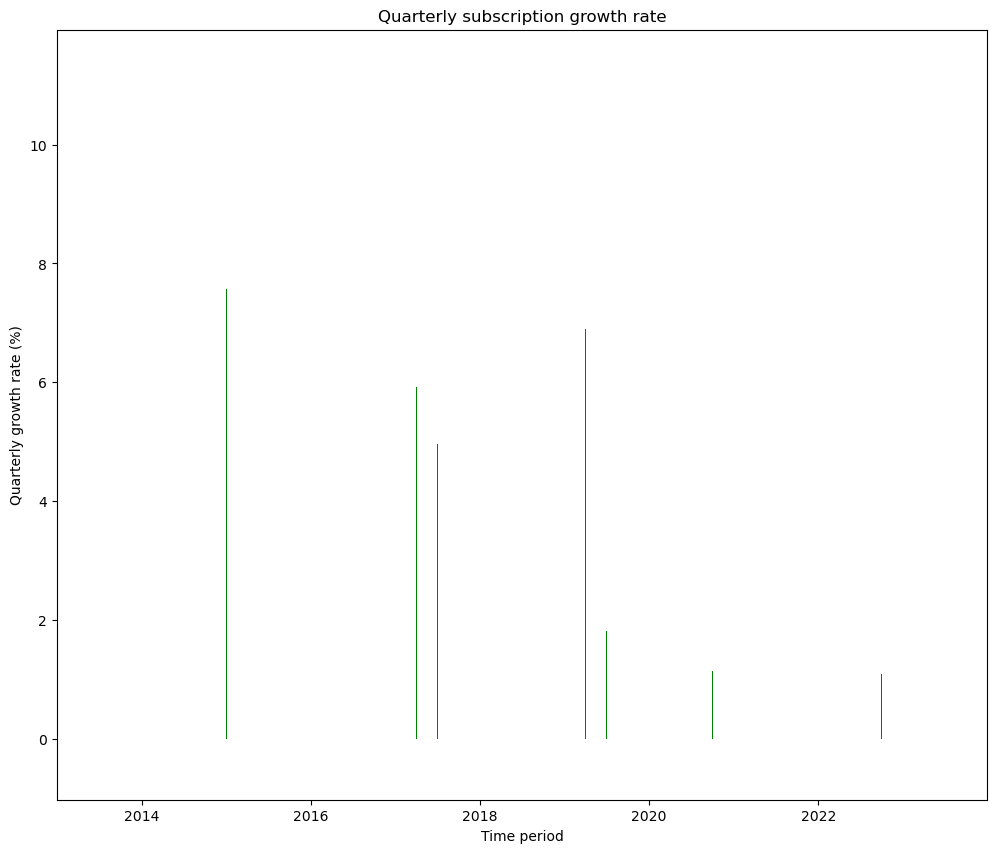

In [47]:
# Bar colouring green for positive growth, red for negative

data["bar_color"]=data["quarterly_growth_rate"].apply(lambda x:"green" if x > 0 else "red")

plt.figure(figsize=(12,10))
bar_width= 0.5
colors=data["bar_color"].values
bars=plt.bar(data["Time Period"],data["quarterly_growth_rate"],color=data["bar_color"])
plt.title("Quarterly subscription growth rate")
plt.xlabel("Time period")
plt.ylabel("Quarterly growth rate (%)")
plt.show()

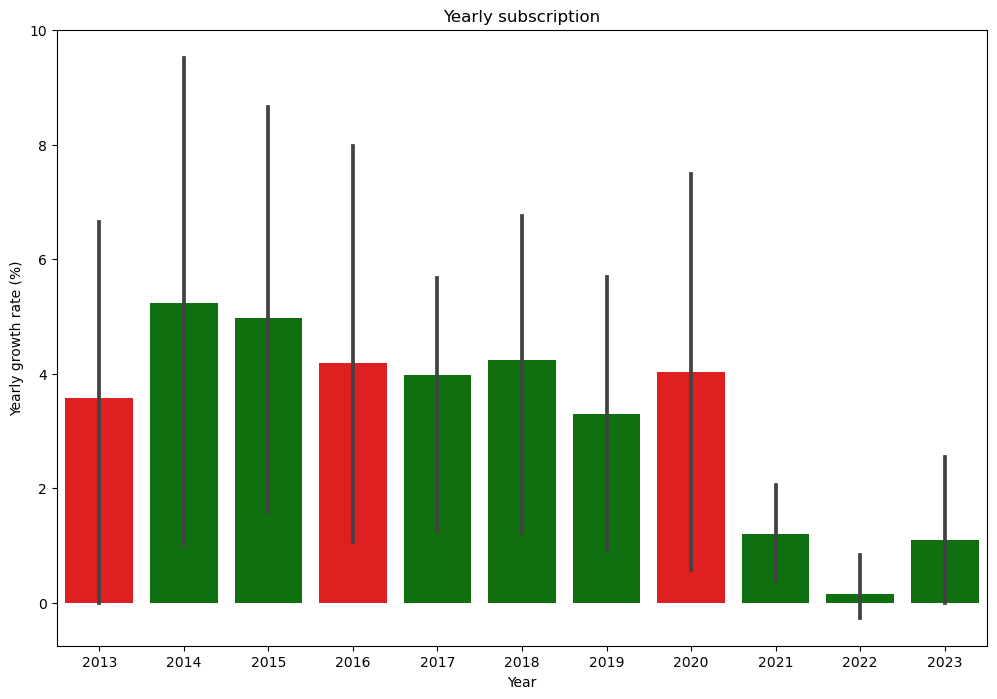

In [40]:
# Yearly growth rate

data["year"]=data["Time Period"].dt.year

yearly_growth=data.groupby("year")["Subscribers"].pct_change().fillna(0) * 100
data["yearly_growth"] = yearly_growth

data["bar_color"]= data["yearly_growth"].apply(lambda x:"green" if x > 0 else "red")
plt.figure(figsize=(12,8))
sns.barplot(x=data["year"],y=data["yearly_growth"],palette=data["bar_color"].values)
plt.title("Yearly subscription")
plt.xlabel("Year")
plt.ylabel("Yearly growth rate (%)")
plt.show()


In [41]:
# Converting the data frame into a time series formart.

time_series = data.set_index("Time Period")["Subscribers"]
time_series

Time Period
2013-04-01     34240000
2013-07-01     35640000
2013-10-01     38010000
2014-01-01     41430000
2014-04-01     46130000
2014-07-01     47990000
2014-10-01     50650000
2015-01-01     54480000
2015-04-01     59620000
2015-07-01     62080000
2015-10-01     66020000
2016-01-01     70840000
2016-04-01     77710000
2016-07-01     79900000
2016-10-01     83280000
2017-01-01     89090000
2017-04-01     94360000
2017-07-01     99040000
2017-10-01    104020000
2018-01-01    110640000
2018-04-01    118900000
2018-07-01    124350000
2018-10-01    130420000
2019-01-01    139260000
2019-04-01    148860000
2019-07-01    151560000
2019-10-01    158330000
2020-01-01    167090000
2020-04-01    182860000
2020-07-01    192950000
2020-10-01    195150000
2021-01-01    203660000
2021-04-01    207640000
2021-07-01    209180000
2021-10-01    213560000
2022-01-01    221840000
2022-04-01    221640000
2022-07-01    220670000
2022-10-01    223090000
2023-01-01    230750000
2023-04-01    232500000
2023

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



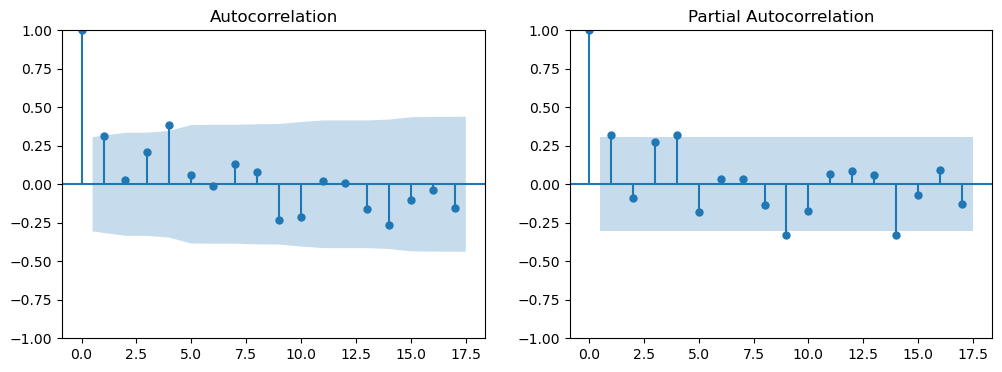

In [42]:
# Finding value of p and q by plotting ACF and PACF

diff_series=time_series.diff().dropna()

# Plotting ACF and PACF

fig,axes=plt.subplots(1,2,figsize=(12,4))
plot_acf(diff_series,ax=axes[0])
plot_pacf(diff_series,ax=axes[1])
plt.show()

In [43]:
p,d,q=1,1,1

model=ARIMA(time_series,order=(p,d,q))

results=model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:            Subscribers   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -672.993
Date:                Wed, 31 Jul 2024   AIC                           1351.986
Time:                        12:23:28   BIC                           1357.127
Sample:                    04-01-2013   HQIC                          1353.858
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.012     80.763      0.000       0.975       1.024
ma.L1         -0.9908      0.221     -4.476      0.000      -1.425      -0.557
sigma2      1.187e+13   1.57e-14   7.57e+26      0.0

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



In [44]:
# Making predictions using the trained model

future_steps =5
predictions=results.predict(len(time_series),len(time_series) + future_steps - 1)

predictions=predictions.astype(int)

predictions

2023-10-01    243321453
2024-01-01    248251638
2024-04-01    253180556
2024-07-01    258108205
2024-10-01    263034587
Freq: QS-OCT, Name: predicted_mean, dtype: int32

In [45]:
# Visualizing the results for the next 5 quarters

#Dataframe with the original data and predictions
forecast = pd.DataFrame({"Original": time_series, "predictions": predictions})

fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.index, y=forecast["predictions"],
                         mode="lines", name="Predictions"))

fig.add_trace(go.Scatter(x=forecast.index, y=forecast["Original"],
                         mode="lines", name="Original Data"))

fig.update_layout(title="Netflix Quarterly Subscription Predictions",
                  xaxis_title="Time Period",
                  yaxis_title="Subscribers",
                  legend=dict(x=0.1, y=0.9),
                  showlegend=True
)



fig.show()

